In order to successfully complete this assignment, you must follow all the instructions in this notebook and upload your edited ipynb file to [D2L](http://d2l.msu.edu/) with your answers on or before **11:59pm on the due date specified on the schedule**.

**BIG HINT:** Read the entire homework before starting.  

# Homework 1: Data as Vectors

These problems are intended to give student's exposure to the style of questions asked on quizzes and help you practice. Please finish the entire Jupyter Notebook and turn in your edited file using the [MSU D2L Website](http://d2l.msu.edu).

### Outline for Homework 1

1. [Solving Systems of Linear Equations](#-Solving-Systems-of-Linear-Equations)
2. [Balancing Equations](#Balancing-Equations)
3. [Chickens and Rabbits](#Chickens-and-Rabbits)
4. [Starship Truckers](#Starship-Truckers)
5. [Good Jacobi / Bad Jacobi](#GJBJ)



---
<a name=-Solving-Systems-of-Linear-Equations></a>
# 1.  Solving Systems of Linear Equations


![Image of tools on the wall ](https://cdn.pixabay.com/photo/2015/12/08/21/42/tools-1083796__340.jpg)

Image obtained from Pixabay under the Creative commons License

In this problem we will revisit a problem discussed in class already, with the Giselle’s earnings as a carpenter and a blacksmith.  In this problem for week 1 she worked a total of 30 hours and earned a total of \\$690, where her wages as a carpenter were \\$20/hour and as a blacksmith were \\$25/hour.  This generated the following set of linear equations:

$$ c+b = 30$$
$$20c+25b=690$$

Now here is the new information.  For any job, there are two parts of the time spent; work set-up and work completion.  Giselle spent $1/10$ of her work-setup time and $2/3$ of her work completion time on carpentry, so she spent $9/10$ of her work setup time and $1/3$ of her work completion time on blacksmithing.  If ```s``` is the amount of work set-up time, and ```w``` is the amount of work completion time, we get the equations:

$$ \frac{1}{10}s + \frac{2}{3}w = c$$
$$ \frac{9}{10}s + \frac{1}{3} w = b$$

To solve for s and w, there are 2 ways: first we can solve for c and b, and then solve for s and w; or second, we can solve for s and w directly.

In [1]:
%matplotlib inline 
import matplotlib.pylab as plt
import numpy as np
import sympy as sym
sym.init_printing()

&#9989;  **<font color=red>QUESTION 1:</font>** (4pts)  use python to solve for c and b in the original set of equations

In [2]:
#put your answer to the above question here.
B = np.matrix([[1,1],[20,25]])
b = np.matrix([[30],[690]])
x = np.linalg.solve(B, b)

&#9989;  **<font color=red>QUESTION 2:</font>** (4 pts) Using your answers for ```c``` and ```b```, generate the augmented matrix ```A``` for solving for ```s``` and ```w```. 

In [3]:
#Put your answer to the above question here.
c = x[0,0]
b = x[1,0]
A = np.matrix([[1/10, 2/3, c], [9/10, 1/3, b]])

In [4]:
from answercheck import checkanswer

checkanswer.matrix(A,"31ec508251cdc937ccba2f25a6aff458");

Testing [[ 0.1      0.66667 12.     ]
 [ 0.9      0.33333 18.     ]]
Answer seems to be correct



&#9989;  **<font color=red>QUESTION 3:</font>** (4pts) Use Gauss Jordan and the reduced row echelon form to solve for ```s``` and ```w``` for your augmented matrix in question 2.

In [5]:
# Put your answer to the above question here
RREF = sym.Matrix(A).rref()[0]

s= RREF[0,2]
w = RREF[1,2]


In [6]:
from answercheck import checkanswer

checkanswer.vector([s,w],"8d69467202b2e2cd7f3a18d614028316");


    Trying to convert to a array matrix using ```A = np.matrix(A)```.


    Trying to convert to float using ```A = A.astype(float)```.

Testing [[14.11765 15.88235]]
Answer seems to be correct



&#9989;  **<font color=red>QUESTION 4:</font>** (4pts) Multiply the following 2 matrices and store them in a variable named ```A2```:


$$ 
\left[
\begin{matrix}
    1 & 1  \\
    20 & 25
 \end{matrix}
\right] 
\left[
\begin{matrix}
    \frac{1}{10} & \frac{2}{3}  \\
    \frac{9}{10} & \frac{1}{3} 
 \end{matrix}
\right] 
$$

In [7]:
# Put your answer to the above equation here. 
import numpy as np
A_1 = np.matrix([[1,1],[20,25]])
A_2 = np.matrix([[1/10,2/3],[9/10,1/3]])
A2 = np.dot(A_1,A_2)

In [8]:
from answercheck import checkanswer

checkanswer.matrix(A2,"dcac2bb51a2f3bb09877934788038de5");

Testing [[ 1.       1.     ]
 [24.5     21.66667]]
Answer seems to be correct



&#9989;  **<font color=red>QUESTION 5:</font>** (4pts) Solve the resulting set of equations with

$$ 
\left[
\begin{matrix}
    1 & 1  \\
    20 & 25
 \end{matrix}
\right] 
\left[
\begin{matrix}
    \frac{1}{10} & \frac{2}{3}  \\
    \frac{9}{10} & \frac{1}{3} 
 \end{matrix}
\right] 
\left[
\begin{matrix}
    s \\
    w
 \end{matrix}
\right] 
=
\left[
\begin{matrix}
    30 \\
    690
 \end{matrix}
\right] 
$$

In [9]:
# Put your answer to the above equation here
# from the above equation we have the multiplication 
# result stored in A2.
C = np.matrix([[30],[690]])
x1 = np.linalg.solve(A2, C)
s2 = x1[0,0]
w2 = x1[1,0]

In [10]:
from answercheck import checkanswer

checkanswer.vector([s2,w2],"8d69467202b2e2cd7f3a18d614028316");


    Trying to convert to a array matrix using ```A = np.matrix(A)```.

Testing [[14.11765 15.88235]]
Answer seems to be correct



**_Notice that if we did everything correctly the answer for Question 5 is the same as the answer for Question 3._** 



---
<a name=Balancing-Equations></a>
# 2. Balancing Equations




![IMage of a scale representing the balance of time and money.  This image is being used to show the balance of linear systems](https://i1.pickpik.com/photos/478/881/147/justice-scales-balance-lawyer-preview.jpg)

One of the earliest applications of matrix algebra was to solve systems of linear equations. We encounter these in all sorts of situations throughout our lives. In the first two questions below we ask you to formulate and solve a system of linear equations related to figuring out the number of hours worked at two different jobs. In the third and fourth problems we ask you to use Gauss-Jordan elimination to balance chemical equations. The last question is about matrix multiplication.

In [11]:
%matplotlib inline 
import matplotlib.pylab as plt
import numpy as np
import sympy as sym
sym.init_printing()

### Situation for problems 1 and 2.
Amy works for a movie theater. She can be assigned to two different jobs during her shift and each job pays a different amount of money. If Amy works at the concessions stand then she will make \\$14.50 an hour, and \\$12.15 an hour for selling tickets. Last week, Amy worked a total of 39.5 hours and earned \\$525.75. (Disregard all taxes.) If we set $c$ to be the number of hours worked on concessions and $t$ to be the number of hours worked selling tickets then we get two equations 

$$ c + t = 39.5,$$

$$ 14.50c + 12.15t = 525.75.$$

&#9989;  **<font color=red>QUESTION 1:</font>** (4pts)  Represent the above system of equations as a matrix equation of the form $Ax = b$ and then use ``numpy`` to solve the system.

In [12]:
##Edit this cell to answer the question.
A = np.matrix([[1,1],[14.50,12.15]])
b = np.matrix([[39.5],[525.75]])
x = np.linalg.solve(A, b)

In [13]:
from answercheck import checkanswer

checkanswer.vector(x,"92b54c2b36360ec6cc21ca67bc8eeb41");


    Trying to convert to a column vector using ```A = A.T```.

Testing [[19.5 20. ]]
Answer seems to be correct



&#9989;  **<font color=red>QUESTION 2:</font>** (4 pts) Use complete sentences to describe what the three values $A_{2,2}$, $x_{1,1}$, and $b_{2,1}$ represent in the context of Amy's situation.

COMPLETE THE FOLLOWING SENTENCES..

The value $A_{2,2}$ represents the amount of money an hour that she makes by selling tickets.

The value $x_{1,1}$ represents the total hours, Amy worked at the concession stand.

The value $b_{2,1}$ represents total amount of money, Amy earned by working at concession stand and selling tickets.

----
### Situation for problems 3 and 4.

A chemical equation is the symbolic representation of a chemical reaction in the form of symbols and formulae, wherein the reactant entities are given on the left-hand side and the product entities on the right-hand side. The coefficients of the symbols represent the number of molecules of each chemical required to preserve matter in the chemical reaction. 

For example, the process of burning methane is represented by the chemical equation

$$ 1 CH_4 + 2 O_2 \rightarrow 1CO_2 + 2 H_2O$$

We see there are a total of 1 unit of C (carbon), four units of H (hydrogen), and 4 units of O (oxygen) on the left, and the same on the right. These numbers are computed by multiplying the coefficient by the subscript.

We can represent this reaction using vectors. If the coefficients are unknown then we have 

$$x_1 CH_4 + x_2 O_2 \rightarrow x_3 CO_2 + x_4 H_2O$$

Here we see that each chemical in the reaction gives us an unknown variable, and we can obtain an equation in these variables for each element in the reaction. 

$$ C: x_1  = x_3 $$
$$ H: 4x_1 = 2x_4$$
$$ O: 2x_2 = 2x_3 + x_4$$

which leads us to the augmented matrix $$ \left[ \begin{matrix} 1 & 0 & -1 & 0 \\ 4 & 0 & 0 &-2 \\ 0 & 2 & -2 & -1  \end{matrix} \, \middle\vert \, \begin{matrix} 0 \\ 0 \\ 0 \end{matrix} \right]
\stackrel{RREF}{\longrightarrow}
\left[ \begin{matrix} 1 & 0 &  & -0.5 \\ 0 & 1 & 0 &-1 \\ 0 & 0 & 1 & -0.5  \end{matrix} \, \middle\vert \, \begin{matrix} 0 \\ 0 \\ 0 \end{matrix} \right]$$

This leads us to equations $$x_1 - \frac 1 2 x_4 = 0$$

$$ x_2 -  x_4 = 0$$

$$ x_3 - \frac 1 2 x_4 = 0$$

To get integer values for our solution we can take $x_4 =2$ and see that $x_1 = 1, x_2 = 2,$ and $x_3 = 1$.

---

The (unbalanced) chemical reaction $$Ca(OH)_2 + H_3PO_4 \rightarrow Ca_3(PO_4)_2 + H_2O$$ mixes calcium hydroxide with phosphoric acid to create tricalcium phosphate and water. This chemical equation is unbalanced and so assigning variables to the coefficients 

$$x_1 Ca(OH)_2 + x_2H_3PO_4 \rightarrow x_3Ca_3(PO_4)_2 + x_4H_2O$$

produces the augmented matrix 

$$ M = \left[ \begin{matrix} 1 & 0 & -3 & 0 \\ 2 & 4 & -8 &-1 \\ 2 & 3 & 0 & -2 \\ 0 & 1 & -2 & 0  \end{matrix} \, \middle\vert \, \begin{matrix} 0 \\ 0 \\ 0 \\0 \end{matrix} \right]$$

&#9989;  **<font color=red>QUESTION 3:</font>** (4pts) Find the reduced row echelon form of the matrix $M$ above. Save the reduced matrix as ``rref`` for answer check.

In [16]:
#Edit this cell to answer this question.
import numpy as np
import sympy as sym
M = np.matrix("1,0,-3,0,0;2,4,-8,-1,0;2,3,0,-2,0;0,1,-2,0,0")

rref = sym.Matrix(M).rref()[0]
r = 0
A = np.matrix([(1/2)*r, (1/3)*r, (1/6)*r, r])
sym.Matrix(A)

[0.0  0.0  0.0  0.0]

In [17]:
from answercheck import checkanswer

checkanswer.matrix(rref,"4c1a09e6f2097c1319ee4704fe05dce2");


    Trying to convert to a array matrix using ```A = np.matrix(A)```.


    Trying to convert to float using ```A = A.astype(float)```.


    Converting to positive values of zero using  ```A[A==-0] = 0```.

Testing [[ 1.       0.       0.      -0.5      0.     ]
 [ 0.       1.       0.      -0.33333  0.     ]
 [ 0.       0.       1.      -0.16667  0.     ]
 [ 0.       0.       0.       0.       0.     ]]
Answer seems to be correct



&#9989;  **<font color=red>QUESTION 4:</font>** (4pts) What is the smallest non-zero **integer** solution to the balanced chemical equation associated to the matrix $M$? Save your answer as ``solution`` which is a list of $x_1,x_2,x_3,x_4$

In [18]:
#Edit this cell to save your answer.

solution=[3,2,1,6]

In [19]:
from answercheck import checkanswer

checkanswer.vector(np.matrix(solution),"d77e1deb873284993997612ecdd339c1");


    Trying to convert to float using ```A = A.astype(float)```.

Testing [[3. 2. 1. 6.]]
Answer seems to be correct



-------
The following question is unrelated to the system of equations above. It is a question about matrix multiplication.

&#9989;  **<font color=red>QUESTION 5:</font>** (4pts) Suppose $A,$ $B,$ and $C$ are matrices that satisfy $$A + BB^T = C,$$ where $B^T$ is the transpose of $B$.

Which of the following statements are **always** true? (Note. There may be more than one.) 

1. $A$ is square.
1. $A$ and $B$ have the same dimensions.
1. $A$, $B$, and $C$ have the same number of rows.
1. $B$ is a tall matrix. That is, $B$ has more rows than columns.
1. $B$ is a wide matrix. That is, $B$ has more columns than rows.

In [20]:
#Edit this cell to save your answer.
#WRITE THE NUMBERS CORRESPONDING TO THE TRUE STATEMENTS IN A LIST BELOW
solution=[1,3]


---
<a name=Chickens-and-Rabbits></a>
# 3. Chickens and Rabbits



<img src="https://wiki.jsswsq.com/images/0/09/%E9%B8%A1%E5%85%94%E5%90%8C%E7%AC%BC%E9%97%AE%E9%A2%98.png" alt="Image of chickens and rabbits in a cage as a visual representation of the problem"> 

Above is a famous primary school math olympiad problem: there are only chickens and rabbits in a cage. After counting, we found there are totally 35 heads and 94 feet. How many do we have for each kind?


Let us have some fun by using linear algebra to solve an advanced version of it. There are spiders, dragonflies, and cicadas totally 18 insects in a cage. We have a total of 116 legs and 22 pairs of wings. How many insects do we have of each kind? (spider has 8 legs and 0 wings; dragonfly has 6 legs and 2 pairs of wings; cicada has 6 legs and 1 pair of wings)

&#9989; **<font color=red>Question 1:</font>** (5pts) Suppose there are $x$ spiders, $y$ dragonflies, and $z$ cicadas. Set up three linear equations involving $x$, $y$, and $z$.  

$$x+y+z=18$$
$$8x+6y+6z=116$$
$$2y+z=22$$

&#9989; **<font color=red>Question 2:</font>** (6pts) Write out the augmented matrix $A$ for the linear equations you set up above, and reduce it to the REF (Row Echelon Form) **(not RREF)** by hand. (Please just provide the REF below, no need to show the intermediate steps)

In [21]:
#Put your answer here
import numpy as np
A = np.matrix([[8,6,6,116],[0,2,1,22],[1,1,1,18]])
A_REF = np.matrix([[1,0,0,4],[0,1,0,8],[0,0,1,6]])

In [22]:
from answercheck import checkanswer
checkanswer.eq_matrix(A,'bb6c9782ce482b2aea5d41312e9697c4');


    Trying to convert to float using ```A = A.astype(float)```.


    Converting to positive values of zero using  ```A[A==-0] = 0```.


    Trying to convert to float using ```A = A.astype(float)```.


    Converting to positive values of zero using  ```A[A==-0] = 0```.

Testing [[1. 0. 0. 4.]
 [0. 1. 0. 8.]
 [0. 0. 1. 6.]]
Answer seems to be correct



In [23]:
checkanswer.eq_matrix(A_REF,'bb6c9782ce482b2aea5d41312e9697c4');


    Trying to convert to float using ```A = A.astype(float)```.


    Converting to positive values of zero using  ```A[A==-0] = 0```.


    Trying to convert to float using ```A = A.astype(float)```.


    Converting to positive values of zero using  ```A[A==-0] = 0```.

Testing [[1. 0. 0. 4.]
 [0. 1. 0. 8.]
 [0. 0. 1. 6.]]
Answer seems to be correct



In [24]:
checkanswer.vector([A_REF[1,0],A_REF[2,0],A_REF[2,1]],'b5021f73f68b6e2f957706af7a39ac75')


    Trying to convert to a array matrix using ```A = np.matrix(A)```.


    Trying to convert to float using ```A = A.astype(float)```.


    Converting to positive values of zero using  ```A[A==-0] = 0```.

Testing [[0. 0. 0.]]
Answer seems to be correct



&#9989; **<font color=red>Question 3:</font>** (5pts) Use sympy to reduce the augemented matrix $A$ to the **Reduced Row Echelon Form** (RREF).

In [25]:
#Put your answer here
RREF = sym.Matrix(A_REF).rref()[0]
RREF

⎡1  0  0  4⎤
⎢          ⎥
⎢0  1  0  8⎥
⎢          ⎥
⎣0  0  1  6⎦

In [26]:
from answercheck import checkanswer
checkanswer.matrix(RREF,'bb6c9782ce482b2aea5d41312e9697c4');


    Trying to convert to a array matrix using ```A = np.matrix(A)```.


    Trying to convert to float using ```A = A.astype(float)```.


    Converting to positive values of zero using  ```A[A==-0] = 0```.

Testing [[1. 0. 0. 4.]
 [0. 1. 0. 8.]
 [0. 0. 1. 6.]]
Answer seems to be correct



&#9989; **<font color=red>Question 4:</font>** (2pts) Use the RREF you found in Question 3 to derive the solution to the original linear system. 

In [27]:
# Put your answer here
x = RREF[0,3]
y = RREF[1,3]
z = RREF[2,3]

In [28]:
from answercheck import checkanswer
checkanswer.vector([x,y,z],'c550ab8dd2e8d171e88dd545ad653bff');


    Trying to convert to a array matrix using ```A = np.matrix(A)```.


    Trying to convert to float using ```A = A.astype(float)```.

Testing [[4. 8. 6.]]
Answer seems to be correct



&#9989; **<font color=red>Question 5:</font>** (2pts) For the RREF you found in Question 3, which part of it  corresponds to an identity matrix? 

The First three columns x First three rows, i.e., the sub-matrix 3x3 of A_REF is an Identity matrix of degree 3.
$$ A-REF(Identity) = \left[ \begin{matrix} 1 & 0 & 0  \\ 0 & 1 & 0 \\ 0 & 0 & 1  \end{matrix}  \right]$$



---
<a name=Starship-Truckers></a>
# 4. Traffic Control

<img src="https://i.imgur.com/HvLmJN3.png" alt="Image of traffic coming in and out of 4 intersections" />

The city of Lansing is trying to resolve traffic congestion at the intersections of Saginaw, Larch, Michigan, and Cedar, as shown in the figure above. The streets are one-way, as indicated by the arrows.

The city wishes to improve the signals at these corners so as to speed the trafic flow. The data the traffic engineers have gathered shows the following:
* 700 cars/hour come down Saginaw to intersection A.
* 300 cars/hour come down Cedar to intersection A.
* A total of $x_1$ cars leave A on Saginaw.
* A total of $x_4$ cars leave A on Cedar.
The number of cars entering A must equal the number leaving, so 
$$x_1+x_4 = 700+300$$
or equivalently
$$x_1+x_4 = 1000.$$



&#9989; **<font color=red>Question 4.a:</font>** (4pts) Write the three equations represeting the traffic entering and leaving intersections B, C, and D.

For B:
$$x_1+x_2=1100$$
For C:
$$x_2+x_3 = 700$$
For D:
$$x_3+x_4=600$$

&#9989; **<font color=red>Question 4.b:</font>** (3pts) Use the four equations to set up and augmented matrix and solve the system by the Gauss-Jordan method, using $x_4$ as the parameter. Explain why, based on the RREF of the matrix, we have an infinite number of solutions and why we can use $x_4$  as the parameter.

#Put your answer to the above question here (you can edit the matrix)
The augmented matrix is
$$A = \left[ \begin{array}{rrrr|r}
1 & 0 & 0 & 1 &1000 \\
1 & 1 & 0 & 0 &1100 \\
0 & 1 & 1 & 0 &700 \\
0 & 0 & 1 & 1 &600 
\end{array}
\right]$$

The reduced row echelon form of A is
$$B = \left[ \begin{array}{rrrr|r}
1 & 0 & 0 & 1 &1000 \\
0 & 1 & 0 & -1 &100 \\
0 & 0 & 1 & 1 &600 \\
0 & 0 & 0 & 0 &0 
\end{array}
\right]$$

We have infinite number of solution becuase for last row, we do not have a specific value and we need to put any value to find the answer. We can use $x_4$ as a parameter because it is free as its value.

&#9989; **<font color=red>Question 4.c:</font>** (3pts) Based on your solution in 4.b, what are the largest and smallest possible values for the number of cars leaving interection A on Cedar?

* x1 + x4 = 1000
* x2 - x4 = 100
* x3 + x4 =600

x1 + 600 = 100 - > x1 = 400

x2 = 700

x3 = 0

conclusion, x4 = 600 is a good value.

conclusion, the largest value of x4 = 600

**The largest possible value would be 600 cars and the smallest number of cars would be 0 cars.**

&#9989; **<font color=red>Question 4.d:</font>** (7pts) Similar to above, what are the largest and smallest possible values for $x_1$, $x_2$, $x_3$?

**The largest value for $x_1$ would be 1000 cars and the smallest number of cars would be 400 cars.**

**The largest value of $x_2$ would be 700 cars and the smallest number of cars would be 100 cars.**

**The largest value of $x_3$ would be 600 cars and the smallest number of cars would be 0 cars.**

&#9989; **<font color=red>Question 4.e:</font>** (3pts) Could we have chosen any one of the other variables as a parameter (instead of $x_4$)? Explain your reasoning.

Yes, we can choose any other variable, but choosing $x_4$ is most convenient for us because it is present in all the equations.

---
<a name=GJBJ></a>
# 5. Good Jacobi / Bad Jacobi

Recall from class the Jacobi method for for solving a system of equations. Recall that the Jacobi Method will not work an all problems.  A sufficient (but not necessary) condition for the method to converge is that the matrix A is strictly diagonally dominant.

&#9989; **<font color=red>Question 1.</font>** (2pts) Write in your own words what strictly diagonally dominant means. 

Diagonally dominant matrix means that for each row, the absolute value of the diaginal entry is greater than or equal to the sum of the remaining entries. For example, if we have a $2\times2$ matrix, then $|a_{11}|$ $\geq$ $|a_{12}|$ and $|b_{22}| \geq |b_{21}|$.

&#9989; **<font color=red>Question 2.</font>** (5pts) Give an example of a system of equations which has a strictly diagonally dominant matrix A.  Use the Jacobi method to solve the system. Verify that your answers are correct!

The equation is:
$$-3x+2y=1$$
$$3y+2z=1$$
$$z = 1$$

The value of x: 0.56
The value of y: -0.33
The value of z: 1


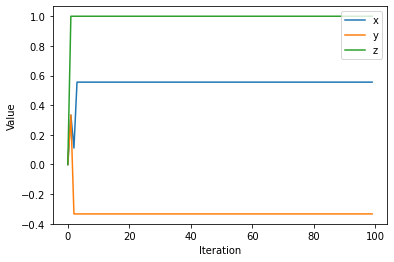

In [29]:
%matplotlib inline
import matplotlib.pylab as plt

x = []
y = []
z = []

#step 1: inicialize to zero
x.append(0)
y.append(0)
z.append(0)

for i in range(1,100):
    xi = (1 - 2*y[i-1])/3
    yi = (1 - 2*z[i-1])/3
    zi = 1
#####End of your code here#####        
    #Add latest value to history
    x.append(xi)
    y.append(yi)
    z.append(zi)

#Plot History of values
plt.plot(x, label='x')
plt.plot(y, label='y')
plt.plot(z, label='z')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend(loc=1);
print("The value of x:", round(x[-1],2))
print("The value of y:", round(y[-1],2))
print("The value of z:", round(z[-1],2))

In [61]:
#proving that we have done right:
x1 = x[-1]
z1 = z[-1]
y1 = y[-1]
(-3)*(x1) + 2*y1 == 1
3*y1 + 2*z1 == 1
z1 == 1

True

&#9989; **<font color=red>Question 3.</font>** (5pts) Notice that a matrix being strictly diagonally dominant is not a necessary condition for the Jacobi method to work. Give an example of a system of equations which does not have a strictly diagonally dominant matrix A but where the Jacobi method still works. Use the Jacobi method to solve the system. Verify that your answers are correct!

The system of equation is:
$$ 6x + 2y - ~z = 4~$$
$$~ x + 5y + ~z = 3~$$
$$ 2x +~ y + 4z = 27$$


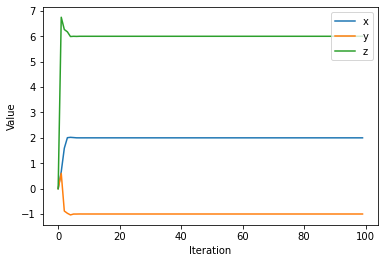

In [62]:
%matplotlib inline
import matplotlib.pylab as plt

x = []
y = []
z = []

#step 1: inicialize to zero
x.append(0)
y.append(0)
z.append(0)

for i in range(1,100):
    xi = (4 - 2*y[i-1]+ z[i-1])/6
#####Start your code here #####
    yi = (3 - z[i-1] - x[i-1])/5
    zi = (27 - y[i-1] - 2*x[i-1])/4
#####End of your code here#####        
    #Add latest value to history
    x.append(xi)
    y.append(yi)
    z.append(zi)

#Plot History of values
plt.plot(x, label='x')
plt.plot(y, label='y')
plt.plot(z, label='z')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend(loc=1);

In [63]:
#proving that we have done right:
x = 2
z = 6
y = -1
(6*2) + (2*(-1)) - 6 == 4
2 + (5*(-1)) + 6 == 3
(2*2) - 1 +(4*6) == 27

True

&#9989; **<font color=red>Question 4.</font>** (5pts) Give an example of a system of equations with non-zero coefficients which does not have a strictly diagonally dominant matrix A and where sadly the Jacobi method does not work. Use the Jacobi method to try to solve the system. Explain what happens. What should the correct answer have been?

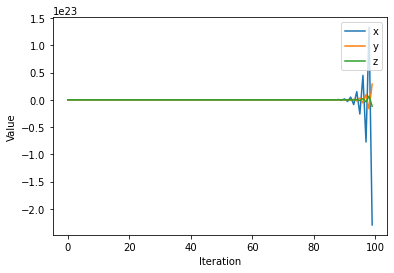

In [64]:
#Put your code to the above question here
#Put your code to the above question here
%matplotlib inline
import matplotlib.pylab as plt

x = []
y = []
z = []

#step 1: inicialize to zero
x.append(0)
y.append(0)
z.append(0)

for i in range(1,100):
    xi = (-35 + 30*y[i-1] - 60*z[i-1])/4
    yi = (420 + 675*z[i-1] + 30*x[i-1])/300
    zi = (1050 +675*y[i-1] - 60*x[i-1])/1620
#####End of your code here#####        
    #Add latest value to history
    x.append(xi)
    y.append(yi)
    z.append(zi)

#Plot History of values
plt.plot(x, label='x')
plt.plot(y, label='y')
plt.plot(z, label='z')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend(loc=1);

Even with large number of cycles, graph diverges and you cannot find a specific solution to the equation.
The equation was :
$$4x-30y+60z=-35$$
$$-30x+300y-675z=420$$
$$60x-675y+1620z=1050$$
The correct solution is:
$$x=1393/4, y={693/5}, z=91/2$$

&#9989; **<font color=red>Question 5.</font>** (3pts) If the Jacobi method doesn't always work and we have other methods that do reliably work why is it still taught in this course? 

The Jacobi method is still taught in class becuase it leads to another more complex methods. Jacobi Method is still used for some applications like Singular Values, Condition Numbers, Rank, Pseudo Inverse, Matrix Coefficient (From Wikipedia). Another thing that I believe that knowing the pseudo code of the Jacobi Method is a good building block for more complex methods and other linear algebra calculations.

---------
### Congratulations, we're done!
